<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20KNN-RNN%20for%2010%20class%20classifications%20based%20on%20UNSW-NB15%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid KNN-RNN for 10 class classifications based on UNSW-NB15 dataset**

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [14]:
# Load the dataset
dataset = pd.read_csv("dataset_P2.2.csv")

# Check for missing values
dataset.isnull().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
Class                0
dtype: int64

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [17]:
from keras.utils import np_utils
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=10)
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X.shape)
print(y.shape)

(175341, 40)
(175341, 10)


In [18]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### **Hybrid KNN-RNN for 10 Class**

In [20]:
# K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [21]:
# RNN model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10)

# Predictions from K-NN model
y_pred_knn = knn.predict(X_test)

# Predictions from RNN model
y_pred_rnn = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = np.argmax(y_pred_rnn, axis=1)

Epoch 1/10
14000/14000 [==============================] - 235s 17ms/step - loss: 512329.6562 - accuracy: 0.1123
Epoch 2/10
14000/14000 [==============================] - 231s 17ms/step - loss: 673.6047 - accuracy: 0.1551
Epoch 3/10
14000/14000 [==============================] - 271s 19ms/step - loss: 1020.4772 - accuracy: 0.2656
Epoch 4/10
14000/14000 [==============================] - 277s 20ms/step - loss: 358.8193 - accuracy: 0.2660
Epoch 5/10
14000/14000 [==============================] - 260s 19ms/step - loss: 60.0813 - accuracy: 0.2789
Epoch 6/10
14000/14000 [==============================] - 238s 17ms/step - loss: 72.3444 - accuracy: 0.2956
Epoch 7/10
14000/14000 [==============================] - 239s 17ms/step - loss: 640.7328 - accuracy: 0.3019
Epoch 8/10
14000/14000 [==============================] - 272s 19ms/step - loss: 20.0614 - accuracy: 0.3210
Epoch 9/10
14000/14000 [==============================] - 238s 17ms/step - loss: 246.9334 - accuracy: 0.3499
Epoch 10/10
3500/3

In [25]:
# Combine predictions from K-NN and RNN models
y_pred = (y_pred_knn + to_categorical(y_pred_rnn, num_classes=10)) // 2

# Evaluation metrics
print("Combined Model:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Combined Model:
              precision    recall  f1-score   support

           0       0.13      0.99      0.24     11277
           1       0.78      0.04      0.07     11343
           2       0.70      0.28      0.40     11225
           3       0.62      0.02      0.03     11219
           4       0.67      0.00      0.00     11297
           5       0.86      0.10      0.18     11174
           6       1.00      0.95      0.97     11074
           7       0.96      0.04      0.08     11129
           8       0.91      0.38      0.54     11112
           9       0.82      0.49      0.61     11150

    accuracy                           0.33    112000
   macro avg       0.75      0.33      0.31    112000
weighted avg       0.74      0.33      0.31    112000

[[11121     1     0     0     1    51     0     2     9    92]
 [10336   416   500    29     0    10     0     0     8    44]
 [ 7908    31  3132    17     1    12     0     3    30    91]
 [10506    31   351   197     0     

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(8,6.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])

  plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid KNN-RNN Model


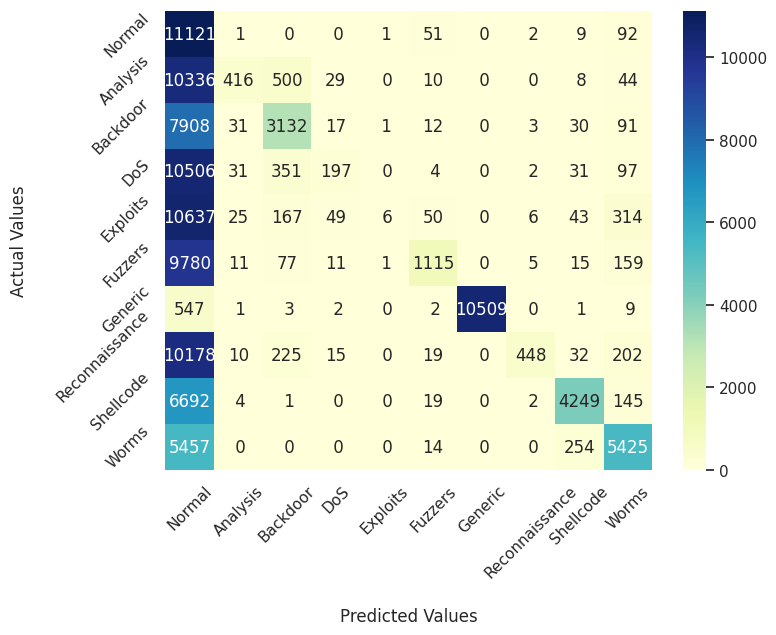

In [28]:
print("Confusion Matrix of Hybrid KNN-RNN Model") 
conf_mat(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

In [30]:
report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), output_dict=True)
detection_rates = {}
for cls in range(10):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

Detection rates: {0: 0.9861665336525671, 1: 0.036674601075553204, 2: 0.2790200445434298, 3: 0.017559497281397628, 4: 0.0005311144551650881, 5: 0.09978521567925541, 6: 0.9489795918367347, 7: 0.04025518914547578, 8: 0.3823794096472282, 9: 0.48654708520179374}
